In [18]:
from ipywidgets import widgets
from ipywidgets import Layout
from IPython import display
import numpy as np
import serial
import time
import sys
import glob
import io

def serial_ports():
    if sys.platform.startswith('win'):
        ports = ['COM%s' % (i + 1) for i in range(256)]
    elif sys.platform.startswith('linux') or sys.platform.startswith('cygwin'):
        # this excludes your current terminal "/dev/tty"
        ports = glob.glob('/dev/tty[A-Za-z]*')
    elif sys.platform.startswith('darwin'):
        ports = glob.glob('/dev/tty.*')
    else:
        raise EnvironmentError('Unsupported platform')

    result = []
    for port in ports:
        try:
            s = serial.Serial(port)
            s.close()
            result.append(port)
        except (OSError, serial.SerialException):
            pass
    return result

def send_printer(cmd='', show=False):
    global ser_p
    ser_p.write(cmd)
    #print cmd
    out = b''
    while ser_p.inWaiting() > 0:
        out += ser_p.read(1)
    if out != '':
        if show:
            print (out)
    return out

def read_scale(n):
    ser_s.reset_input_buffer()
    res=[ser_s.readline() for i in range(n)]
    return [float(res[i].decode()) for i in range(len(res))]

def read_scale_times(t_s=1.):
    res=[]
    res_t=[]
    ser_s.reset_input_buffer()
    start = time.time()

    while (time.time()-start<=t_s):
        res.append(ser_s.readline())
        res_t.append(time.time()-start)
    res=[float(res[i].decode()) for i in range(len(res))]
    
    return res,res_t
    
sports=serial_ports()
ser_p = serial.Serial(sports[0], baudrate=115200) #3d printer
ser_s = serial.Serial(sports[1], baudrate=115200, timeout=5)  #scale

send_printer(b'M203 Z20\r\n',show=True) #increase maximum feedrate for z-axis

send_printer(b'M107\r\n',show=True) #fan off is needed
#2mm/s = 2*60 mm/min=180
send_printer(b'G1 F500\r\n',show=True)
send_printer(b'G91\r\n',show=True) #relative positioning


b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b'ok\nok\nok\nok\nok\nok\nok\n'
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''


CPU times: user 534 ms, sys: 308 ms, total: 842 ms
Wall time: 20 s


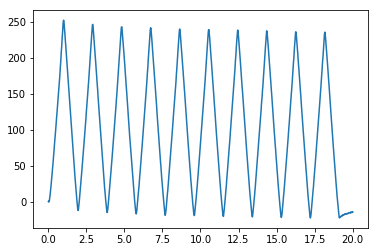

In [90]:
import matplotlib.pyplot as plt
ncycles=10
rate=.5 #frequency of up/down
speed=258./2.*rate
deltaz=.6
send_printer('G1 F{:d}\r\n'.format(int(speed*deltaz)).encode())
for i in range (ncycles):
    send_printer('G0 Z-{:f}\r\n'.format(deltaz).encode())
    send_printer('G0 Z{:f}\r\n'.format(deltaz).encode())
    
%time y,x=read_scale_times(ncycles/rate)
plt.plot(x,y);



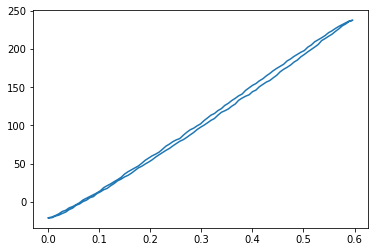

In [91]:
from scipy.signal import argrelextrema
ynp=np.array(y[1200:1500],dtype=np.float32)
mins=argrelextrema(ynp,np.less)[0]
startid=mins[-2]
endid=mins[-1]
z=deltaz-np.fabs(np.linspace(-deltaz,deltaz,endid-startid))
plt.plot(z,ynp[startid:endid]);
